In [1]:
import os 
os.chdir('../')

In [7]:
from IPython.display import Audio
import librosa
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
import random
import joblib
from collections import defaultdict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from src.score_audio import score_eval_directory
from src.score_cnn_eval_directory import score_cnn_eval_directory




In [11]:
sns.set(style='darkgrid')

## Train

python train_baseline.py --data_dir data --out_model models/audio_baseline.joblib

In [ ]:
os.system("python src/train_baseline.py --data_dir data/audio/train --out_model models/audio_baseline.joblib")

[2025-12-29 12:32:44,015] INFO: Collecting dataset features...
[2025-12-29 12:32:44,084] INFO: Processing 2580 real files...
[2025-12-29 12:32:44,614] WARNING: Skipped file (no usable audio): data/audio/train/real/LA_T_1011221.flac
[2025-12-29 12:32:44,662] INFO: Processed 10/2580 real files
[2025-12-29 12:32:44,689] WARNING: Skipped file (no usable audio): data/audio/train/real/LA_T_1052701.flac
[2025-12-29 12:32:44,714] WARNING: Skipped file (no usable audio): data/audio/train/real/LA_T_1078395.flac
[2025-12-29 12:32:44,726] INFO: Processed 20/2580 real files
[2025-12-29 12:32:44,789] WARNING: Skipped file (no usable audio): data/audio/train/real/LA_T_1138215.flac
[2025-12-29 12:32:44,865] INFO: Processed 40/2580 real files
[2025-12-29 12:32:44,939] INFO: Processed 50/2580 real files
[2025-12-29 12:32:45,016] INFO: Processed 60/2580 real files
[2025-12-29 12:32:45,056] WARNING: Skipped file (no usable audio): data/audio/train/real/LA_T_1267917.flac
[2025-12-29 12:32:45,057] WARNING: 

0

## Score

### Real

In [3]:
audio_file = "data/audio/eval/real/LA_E_1002903.flac"

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

In [25]:
os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

{
  "overall_risk": 0.0641,
  "confidence": "low",
  "meta": {
    "speech_seconds": 1.024,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 1.44,
      "end_s": 2.46,
      "risk": 0.0641
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Acoustic indicators are closer to typical human speech patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


0

In [4]:
os.system(f"python src/score_cnn_audio.py --model models/audio_cnn_mel.pt --audio {audio_file}")

data/audio/eval/real/LA_E_1002903.flac: probability_fake=0.0003 predicted_label=real


0

In [5]:
audio_file = "data/audio/eval/real/LA_E_1030819.flac"

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

In [30]:
os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

{
  "overall_risk": 0.2803,
  "confidence": "low",
  "meta": {
    "speech_seconds": 2.24,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 1.5,
      "end_s": 3.74,
      "risk": 0.2803
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Acoustic indicators are closer to typical human speech patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


0

In [6]:
os.system(f"python src/score_cnn_audio.py --model models/audio_cnn_mel.pt --audio {audio_file}")

data/audio/eval/real/LA_E_1030819.flac: probability_fake=0.0042 predicted_label=real


0

In [31]:
audio_file = "data/audio/eval/real/LA_E_1044956.flac"

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

In [32]:
os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

{
  "overall_risk": 0.2063,
  "confidence": "low",
  "meta": {
    "speech_seconds": 1.76,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 2.34,
      "end_s": 4.1,
      "risk": 0.2063
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Acoustic indicators are closer to typical human speech patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


0

### Fake

In [37]:
audio_file = "data/audio/eval/fake/LA_E_1000147.flac"

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

In [38]:
os.system("python src/score_audio.py --model models/audio_baseline.joblib --audio /Users/stevencarrell/Desktop/dev/authenticity-risk-engine/data/audio/eval/fake/LA_E_1001227.flac")

{
  "overall_risk": 0.9836,
  "confidence": "low",
  "meta": {
    "speech_seconds": 3.328,
    "n_segments": 2
  },
  "segment_risks": [
    {
      "start_s": 0.19,
      "end_s": 1.44,
      "risk": 0.9246
    },
    {
      "start_s": 1.63,
      "end_s": 3.71,
      "risk": 0.991
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


0

In [7]:
audio_file = "data/audio/eval/fake/LA_E_1021626.flac"

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

In [ ]:
os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

{
  "overall_risk": 0.0994,
  "confidence": "low",
  "meta": {
    "speech_seconds": 1.984,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 0.03,
      "end_s": 2.02,
      "risk": 0.0994
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Acoustic indicators are closer to typical human speech patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


0

In [8]:
os.system(f"python src/score_cnn_audio.py --model models/audio_cnn_mel.pt --audio {audio_file}")

data/audio/eval/fake/LA_E_1021626.flac: probability_fake=0.6463 predicted_label=fake


0

In [36]:
audio_file = "data/audio/eval/fake/LA_E_1001227.flac"

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

In [ ]:
os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

{
  "overall_risk": 0.9934,
  "confidence": "low",
  "meta": {
    "speech_seconds": 2.368,
    "n_segments": 2
  },
  "segment_risks": [
    {
      "start_s": 0.77,
      "end_s": 1.89,
      "risk": 0.9316
    },
    {
      "start_s": 1.92,
      "end_s": 3.17,
      "risk": 0.8655
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


0

In [40]:
audio_file = "data/audio/eval/fake/LA_E_1002683.flac"


os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

{
  "overall_risk": 0.9997,
  "confidence": "low",
  "meta": {
    "speech_seconds": 2.624,
    "n_segments": 2
  },
  "segment_risks": [
    {
      "start_s": 2.02,
      "end_s": 3.3,
      "risk": 0.9199
    },
    {
      "start_s": 3.42,
      "end_s": 4.77,
      "risk": 0.9887
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


In [42]:
audio_file = "data/audio/eval/fake/LA_E_1000273.flac"


os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

{
  "overall_risk": 0.9506,
  "confidence": "low",
  "meta": {
    "speech_seconds": 1.792,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 0.06,
      "end_s": 1.86,
      "risk": 0.9506
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


In [43]:
audio_file = "data/audio/eval/fake/LA_E_1000791.flac"


os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

{
  "overall_risk": 0.9645,
  "confidence": "low",
  "meta": {
    "speech_seconds": 1.472,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 0.0,
      "end_s": 1.47,
      "risk": 0.9645
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


In [44]:
audio_file = "data/audio/eval/fake/LA_E_1000841.flac"


os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

{
  "overall_risk": 0.9993,
  "confidence": "low",
  "meta": {
    "speech_seconds": 3.008,
    "n_segments": 2
  },
  "segment_risks": [
    {
      "start_s": 0.03,
      "end_s": 1.41,
      "risk": 0.9922
    },
    {
      "start_s": 1.44,
      "end_s": 3.07,
      "risk": 0.9828
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


In [10]:
audio_file = "data/audio/eval/fake/LA_E_1000989.flac"


os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

{
  "overall_risk": 0.0012,
  "confidence": "low",
  "meta": {
    "speech_seconds": 1.248,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 0.77,
      "end_s": 2.02,
      "risk": 0.0012
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Acoustic indicators are closer to typical human speech patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/numpy/_core/numeric.py:1211: RuntimeWarning: divide by zero encountered in dot
  res = dot(at, bt)
/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/numpy/_core/numeric.py:1211: RuntimeWarning: overflow encountered in dot
  res = dot(at, bt)
/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/numpy/_core/numeric.py:1211: RuntimeWarning: invalid value encountered in dot
  res = dot(at, bt)
/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/numpy/_core/numeric.py:1211: RuntimeWarning: divide by zero encountered in dot
  res = dot(at, bt)
/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/numpy/_core/numeric.py:1211: RuntimeWarning: overflow encountered in dot
  res = dot(at, bt)
/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/numpy/_core/numeric.py:1211: RuntimeWarning: invalid value encountered in dot
  res = dot(at, bt)


In [11]:
os.system(f"python src/score_cnn_audio.py --model models/audio_cnn_mel.pt --audio {audio_file}")

data/audio/eval/fake/LA_E_1000989.flac: probability_fake=0.6718 predicted_label=fake


0

In [48]:
audio_file = "data/audio/eval/fake/LA_E_1001320.flac"


os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")

y, sr = librosa.load(audio_file, sr=None)
Audio(y, rate=sr)

{
  "overall_risk": 0.9114,
  "confidence": "low",
  "meta": {
    "speech_seconds": 2.24,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 1.66,
      "end_s": 3.9,
      "risk": 0.9114
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


In [ ]:
os.system(f"python src/score_audio.py --model models/audio_baseline.joblib --audio {audio_file}")


{
  "overall_risk": 0.9114,
  "confidence": "low",
  "meta": {
    "speech_seconds": 2.24,
    "n_segments": 1
  },
  "segment_risks": [
    {
      "start_s": 1.66,
      "end_s": 3.9,
      "risk": 0.9114
    }
  ],
  "evidence": [
    "Short speech duration reduces reliability.",
    "Overall acoustic feature profile is strongly consistent with known spoof patterns."
  ],
  "model": {
    "feature_version": "v1_mfcc_spectral_pitch_median_iqr",
    "sr": 16000
  }
}


In [ ]:


def score_eval_directory(model_path, eval_dir, sr=16000, thresh=0.5, seed=None, sample_size=None):
    """Score all (or a sample of) audio files in 'real' and 'fake' subfolders and calculate per-class and overall accuracy.

    Args:
        model_path (str): Path to the trained model or pipeline (joblib file).
        eval_dir (str): Path to directory containing 'real' and 'fake' subfolders.
        sr (int, optional): Sampling rate for audio loading. Defaults to 16000.
        seed (int, optional): Random seed for reproducible sampling. Defaults to None.
        sample_size (int, optional): If set, randomly sample this many files from each class. Defaults to None (use all files).

    Returns:
        dict: Dictionary with per-class and overall accuracy and results.
    """
    model_obj = joblib.load(model_path)
    model = model_obj["pipeline"] if isinstance(model_obj, dict) and "pipeline" in model_obj else model_obj
    results = defaultdict(list)
    summary = {}
    y_true_all = []
    y_pred_all = []
    for label_str, label in [('real', 0), ('fake', 1)]:
        class_dir = os.path.join(eval_dir, label_str)
        if not os.path.isdir(class_dir):
            summary[f'{label_str}_accuracy'] = None
            summary[f'{label_str}_n'] = 0
            continue
        files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.flac')]
        if sample_size is not None and sample_size < len(files):
            rng = random.Random(seed)
            files = rng.sample(files, sample_size)
        y_true = []
        y_pred = []
        for f in files:
            feats, _ = file_features(f, sr=sr)
            if feats.size == 0:
                continue
            proba = model.predict_proba([feats])[0, 1]
            pred = int(proba >= thresh)
            y_true.append(label)
            y_pred.append(pred)
            results[label_str].append((f, pred, proba))
            y_true_all.append(label)
            y_pred_all.append(pred)
        acc = accuracy_score(y_true, y_pred) if y_true else 0.0
        summary[f'{label_str}_accuracy'] = acc
        summary[f'{label_str}_n'] = len(y_true)
    summary['overall_accuracy'] = accuracy_score(y_true_all, y_pred_all) if y_true_all else 0.0
    summary['overall_precision'] = precision_score(y_true_all, y_pred_all) if y_true_all else 0.0
    summary['results'] = dict(results)
    summary['n_total'] = len(y_true_all)
    # Add confusion matrix
    if y_true_all and y_pred_all:
        cm = confusion_matrix(y_true_all, y_pred_all, labels=[0, 1])
        summary['confusion_matrix'] = cm.tolist()
        summary['confusion_matrix_labels'] = ['real', 'fake']
    else:
        summary['confusion_matrix'] = None
        summary['confusion_matrix_labels'] = ['real', 'fake']
    return summary

In [107]:
directory = "data/audio/eval"
label = ""


In [108]:
 results = score_eval_directory("models/audio_baseline.joblib", directory, sr=16000, seed=1, sample_size=1000)

In [109]:
results

{'real_accuracy': 0.7743830787309048,
 'real_n': 851,
 'fake_accuracy': 0.5444191343963554,
 'fake_n': 878,
 'overall_accuracy': 0.6576055523423945,
 'overall_precision': 0.7134328358208956,
 'results': {'real': [('data/audio/eval/real/LA_E_4207211.flac',
    0,
    np.float64(0.015577891020310139)),
   ('data/audio/eval/real/LA_E_7721272.flac',
    0,
    np.float64(0.0694135226994616)),
   ('data/audio/eval/real/LA_E_9823009.flac',
    0,
    np.float64(0.00012116323997986632)),
   ('data/audio/eval/real/LA_E_5091221.flac',
    1,
    np.float64(0.7566877154687681)),
   ('data/audio/eval/real/LA_E_2352920.flac',
    0,
    np.float64(0.4857214822408902)),
   ('data/audio/eval/real/LA_E_4479083.flac',
    1,
    np.float64(0.9315468956762545)),
   ('data/audio/eval/real/LA_E_4479093.flac',
    0,
    np.float64(0.47053982671465616)),
   ('data/audio/eval/real/LA_E_8963274.flac',
    0,
    np.float64(0.015618148385837749)),
   ('data/audio/eval/real/LA_E_7905661.flac',
    0,
    np.f

In [110]:
real = round(results['real_accuracy'], 2)
fake = round(results['fake_accuracy'], 2)
overall = round(results['overall_accuracy'], 2)

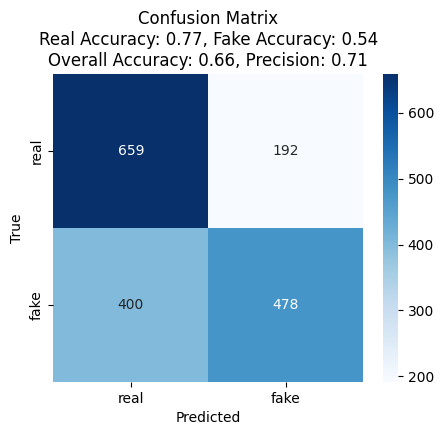

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'results' is the output from score_eval_directory
cm = results['confusion_matrix']
labels = results['confusion_matrix_labels']

precision = results['overall_precision']

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix\nReal Accuracy: {:.2f}, Fake Accuracy: {:.2f}\nOverall Accuracy: {:.2f}, Precision: {:.2f}'.format(real, fake, overall, precision))
plt.show()

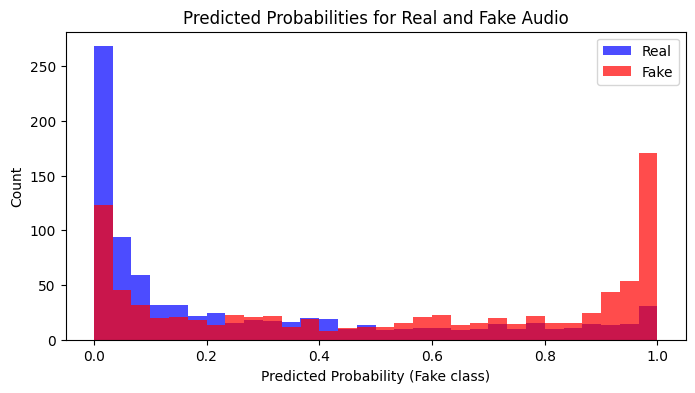

In [113]:
import matplotlib.pyplot as plt

# Assume 'results' is the output from score_eval_directory
real_probs = [proba for _, _, proba in results['results']['real']]
fake_probs = [proba for _, _, proba in results['results']['fake']]

plt.figure(figsize=(8, 4))
plt.hist(real_probs, bins=30, alpha=0.7, label='Real', color='blue')
plt.hist(fake_probs, bins=30, alpha=0.7, label='Fake', color='red')
plt.xlabel('Predicted Probability (Fake class)')
plt.ylabel('Count')
plt.title('Predicted Probabilities for Real and Fake Audio')
plt.legend()
plt.show()

In [115]:
 results = score_eval_directory("models/audio_baseline.joblib", directory, sr=16000, thresh=0.6, seed=1, sample_size=1000)

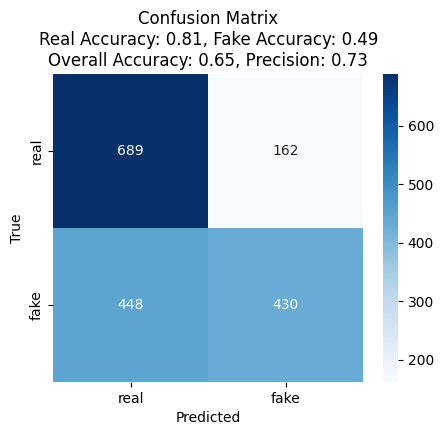

In [116]:
# Assume 'results' is the output from score_eval_directory
cm = results['confusion_matrix']
labels = results['confusion_matrix_labels']

precision = results['overall_precision']
real = results['real_accuracy']
fake = results['fake_accuracy']
overall = results['overall_accuracy']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix\nReal Accuracy: {:.2f}, Fake Accuracy: {:.2f}\nOverall Accuracy: {:.2f}, Precision: {:.2f}'.format(real, fake, overall, precision))
plt.show()

## Train (CNN)

In [3]:
import os
os.system(f"python src/train_cnn_spectrogram.py --data_dir data/audio/train --out_path models/audio_cnn_mel.pt --epochs 12 --batch_size 32 --clip_seconds 4")


{
  "epoch": 1,
  "val": {
    "real_accuracy": 0.9922480620155039,
    "fake_accuracy": 0.6995614035087719,
    "overall_accuracy": 0.7293144208037825,
    "overall_precision": 0.9987476518472135,
    "real_n": 516,
    "fake_n": 4560
  }
}
Saved best model to models/audio_cnn_mel.pt (best fake_accuracy=0.6996)


{
  "epoch": 2,
  "val": {
    "real_accuracy": 0.9864341085271318,
    "fake_accuracy": 0.8701754385964913,
    "overall_accuracy": 0.8819936958234831,
    "overall_precision": 0.9982389937106918,
    "real_n": 516,
    "fake_n": 4560
  }
}
Saved best model to models/audio_cnn_mel.pt (best fake_accuracy=0.8702)


{
  "epoch": 3,
  "val": {
    "real_accuracy": 1.0,
    "fake_accuracy": 0.7548245614035087,
    "overall_accuracy": 0.7797478329393223,
    "overall_precision": 1.0,
    "real_n": 516,
    "fake_n": 4560
  }
}


epoch 4/12:  27%|██▋       | 172/634 [07:25<20:52,  2.71s/it, loss=0.0292]libc++abi: terminating due to uncaught exception of type std::__1::system_error: Broken pipe
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x12f63a660>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/envs/fraud_det/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1618, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/anaconda3/envs/fraud_det/lib/python3.11/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/fraud_det/lib/python3.11/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anac

6

In [9]:
results = score_cnn_eval_directory(
    'models/audio_cnn_mel.pt',
    'data/audio/eval',
    sample_size=1000,
    seed=42
)
print(results)

{'real_accuracy': 0.967, 'fake_accuracy': 0.803, 'overall_accuracy': 0.885, 'overall_precision': 0.9605263157894737, 'results': {'real': [('data/audio/eval/real/LA_E_4272102.flac', 0, 0.004299608524888754), ('data/audio/eval/real/LA_E_4521627.flac', 0, 0.22147831320762634), ('data/audio/eval/real/LA_E_1262130.flac', 0, 0.03852573409676552), ('data/audio/eval/real/LA_E_9728155.flac', 0, 0.0951305627822876), ('data/audio/eval/real/LA_E_5005288.flac', 0, 0.005003518890589476), ('data/audio/eval/real/LA_E_2089289.flac', 0, 0.44586217403411865), ('data/audio/eval/real/LA_E_3849093.flac', 0, 0.0010775328846648335), ('data/audio/eval/real/LA_E_8892307.flac', 0, 0.49625903367996216), ('data/audio/eval/real/LA_E_2931505.flac', 0, 0.11825461685657501), ('data/audio/eval/real/LA_E_7427372.flac', 0, 0.001297361683100462), ('data/audio/eval/real/LA_E_7495971.flac', 0, 0.2169467806816101), ('data/audio/eval/real/LA_E_5793024.flac', 1, 0.5934441089630127), ('data/audio/eval/real/LA_E_1165621.flac', 0

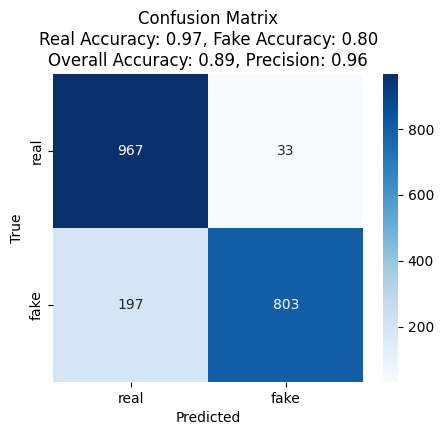

In [10]:
# Assume 'results' is the output from score_eval_directory
cm = results['confusion_matrix']
labels = results['confusion_matrix_labels']

precision = results['overall_precision']
real = results['real_accuracy']
fake = results['fake_accuracy']
overall = results['overall_accuracy']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix\nReal Accuracy: {:.2f}, Fake Accuracy: {:.2f}\nOverall Accuracy: {:.2f}, Precision: {:.2f}'.format(real, fake, overall, precision))
plt.show()

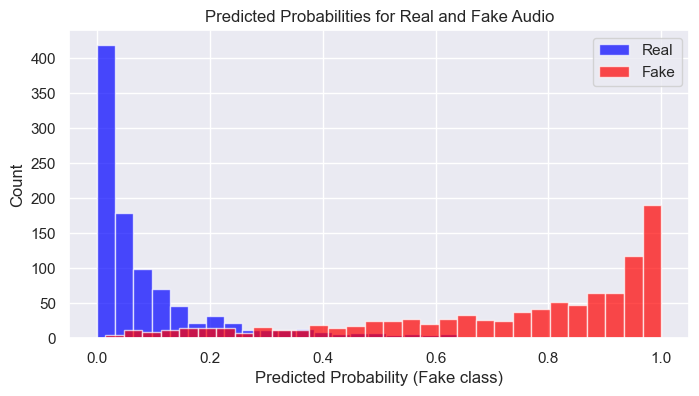

In [12]:
import matplotlib.pyplot as plt

# Assume 'results' is the output from score_eval_directory
real_probs = [proba for _, _, proba in results['results']['real']]
fake_probs = [proba for _, _, proba in results['results']['fake']]

plt.figure(figsize=(8, 4))
plt.hist(real_probs, bins=30, alpha=0.7, label='Real', color='blue')
plt.hist(fake_probs, bins=30, alpha=0.7, label='Fake', color='red')
plt.xlabel('Predicted Probability (Fake class)')
plt.ylabel('Count')
plt.title('Predicted Probabilities for Real and Fake Audio')
plt.legend()
plt.show()